# Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.

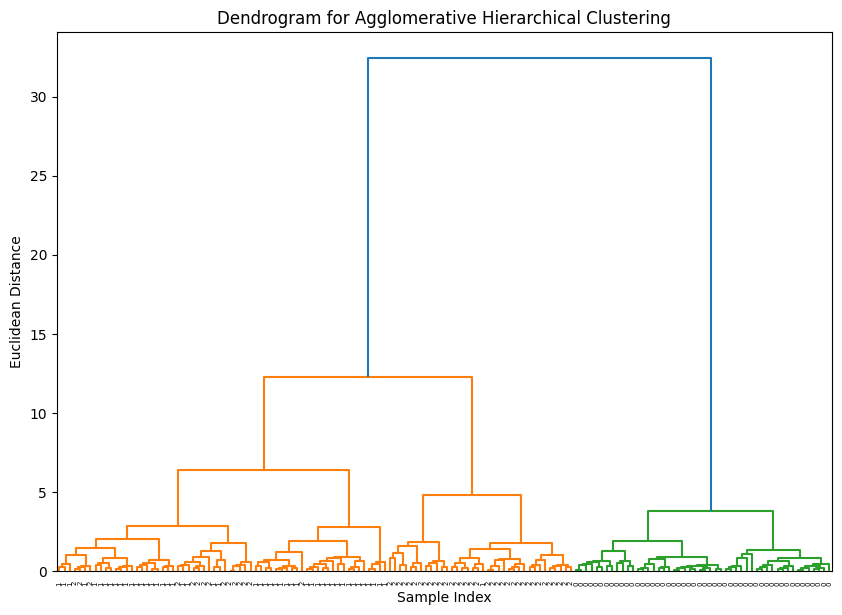

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


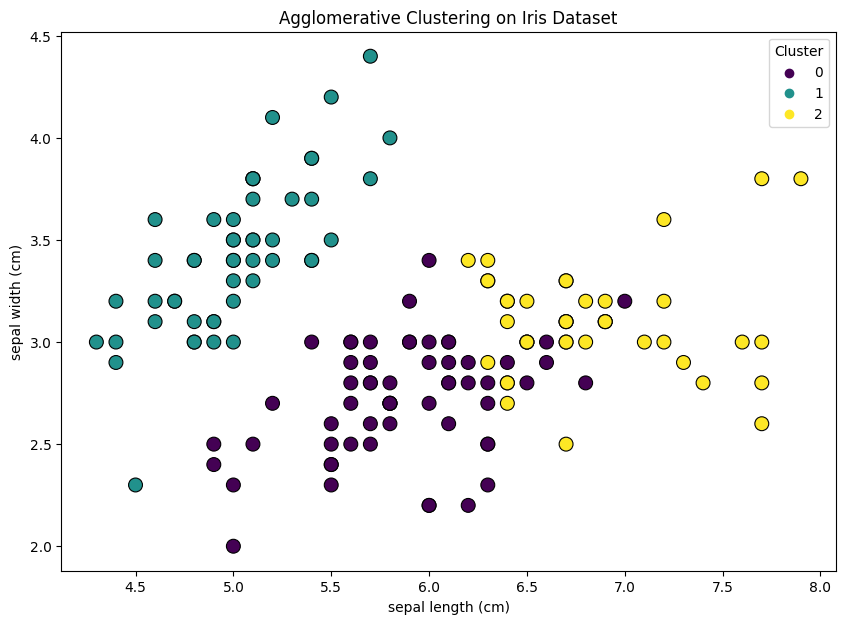

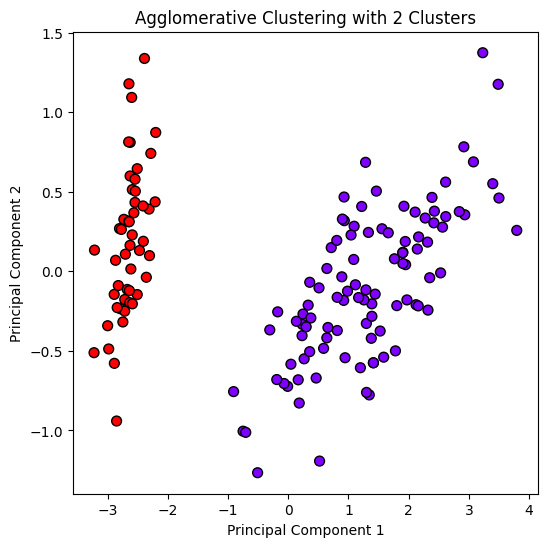

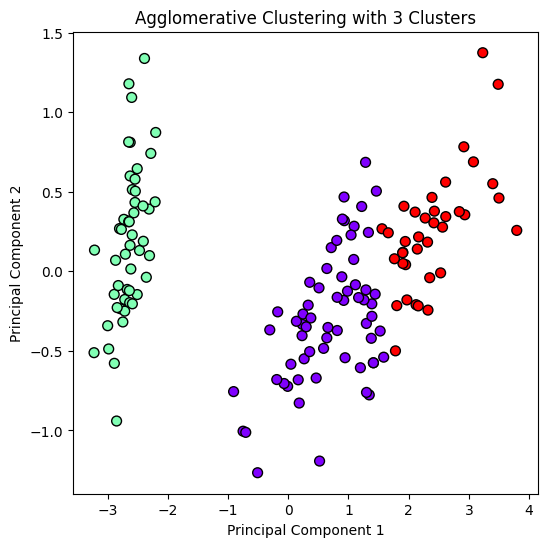

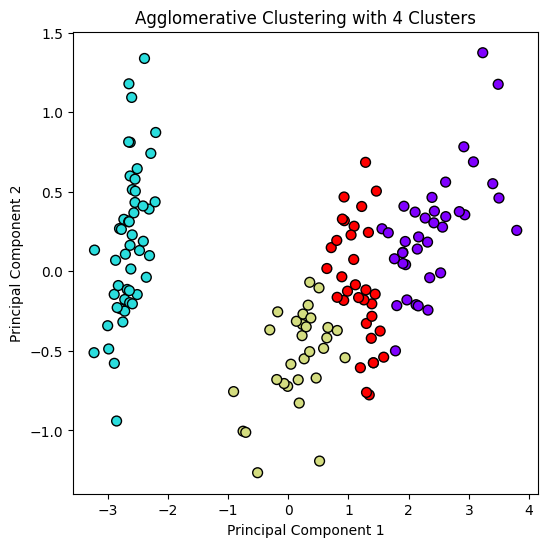

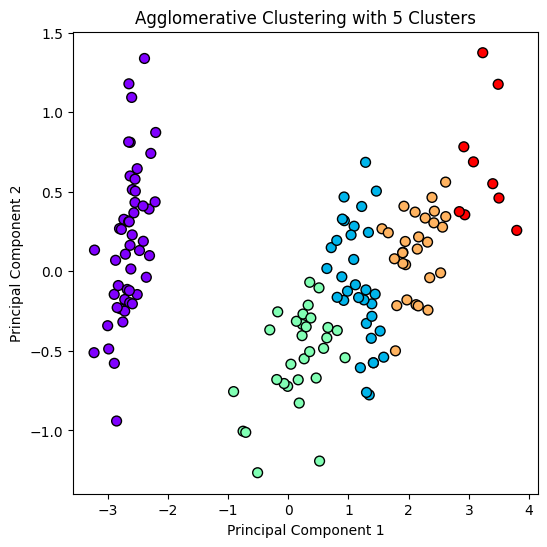

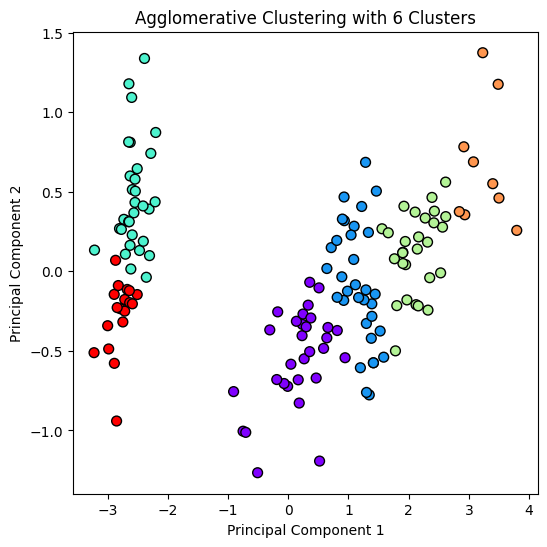

In [ ]:
# Agglomerative clustering is a type of hierarchical clustering method used to group data points based on their similarity
# It is called "agglomerative" because it builds clusters in a "bottom-up" manner. 
# Initially, each data point is treated as a separate cluster. 
# Then, the algorithm iteratively merges the closest pairs of clusters 
# until all points are combined into a single cluster or until a predefined number of clusters is reached.

# A dendrogram is a tree-like diagram that represents the order in which clusters were merged. 
# It’s often used to visualize the results of agglomerative clustering and
#  helps to decide the optimal number of clusters by cutting the tree at a certain height.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target  # True labels, used here just for evaluation purposes

# Step 1: Plot a dendrogram to visualize hierarchical clustering
# Generate linkage matrix for hierarchical clustering
linked = linkage(X, method='ward')

# linkage(X, method='ward') performs the agglomerative hierarchical clustering on data X.
# X is the input dataset (usually a 2D array or dataframe).
# The method='ward' argument specifies the linkage criterion, 
# in this case, the Ward’s minimum variance method. 
# This method minimizes the variance of merged clusters. 
# It is commonly used in hierarchical clustering for its ability to produce compact, spherical clusters.



plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=y,
           distance_sort='descending',
           show_leaf_counts=True)

# dendrogram(linked) generates the dendrogram based on the hierarchical clustering results stored in linked.

# linked contains the linkage matrix produced by the linkage() function, 
# which holds information about the clusters at each step of the agglomerative process.

# orientation='top' specifies that the dendrogram will be drawn with the root at the top.

# labels=y provides labels for the leaf nodes of the dendrogram. 
# y could be the target labels or just the sample indices from your dataset.

# distance_sort='descending' sorts the clusters based on their distances in descending order, 
# placing the larger distances at the top of the dendrogram.

# show_leaf_counts=True displays the number of samples in each cluster at the leaves of the dendrogram.

plt.title("Dendrogram for Agglomerative Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 2: Apply Agglomerative Clustering with sklearn
# Using 3 clusters (since the Iris dataset has 3 classes)
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
predicted_labels = cluster.fit_predict(X)
# n_clusters=3: The algorithm will divide the data into 3 clusters.
# affinity='euclidean': It uses straight-line (Euclidean) distance to measure similarity between points.
# linkage='ward': This merges clusters by keeping them as compact and similar as possible, which often leads to tight, rounded clusters.



# Step 3: Visualize the clustering results in a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predicted_labels, palette='viridis', s=100, edgecolor='k')
plt.title("Agglomerative Clustering on Iris Dataset")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title="Cluster", loc="best")
plt.show()

# Step 4: Visualize clustering for different values of k (2 to 6 clusters)
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Define a function to plot clusters for different values of k
def plot_agglomerative_clustering(X, n_clusters):
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    plt.figure(figsize=(6, 6))
    plt.scatter(X['P1'], X['P2'], c=ac.fit_predict(X), cmap='rainbow', s=50, edgecolor='k')
    plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Loop over different values of k and plot each clustering result
for k in range(2, 7):  # Loop from 2 to 6 clusters
    plot_agglomerative_clustering(X_principal, n_clusters=k)
